In [1]:
import pandas as pd


inp = pd.read_csv("GNEtolC.csv")
out = pd.read_csv("gnetolc_preds.csv")

In [4]:
out["act"]=inp["Activity_tolC"]

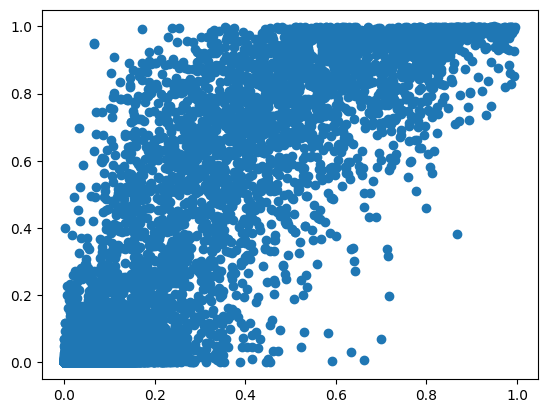

In [6]:
import matplotlib.pyplot as plt
plt.scatter(out["tolc_activity"], out["hts_activity"])

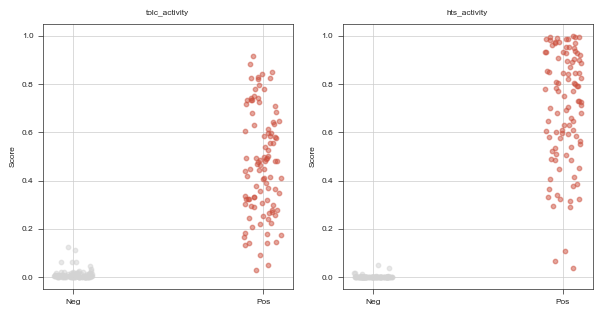

In [7]:
import numpy as np
import stylia as st
from stylia import NamedColors
def plot_yhat(ax, act):
    y_hat = out[act].to_numpy()
    y_true = out["act"].to_numpy()
    y_hats_1 = y_hat[y_true == 1]
    y_hats_0 = y_hat[y_true == 0]
    np.random.shuffle(y_hats_0)
    np.random.shuffle(y_hats_1)
    y_hats_0 = y_hats_0[:100]
    y_hats_1 = y_hats_1[:100]

    for y in zip(y_hats_0):
        jitter = np.random.uniform(-0.1, 0.1)
        color = NamedColors().gray
        ax.scatter([0 + jitter], [y], color=color, alpha=0.5)

    for y in zip(y_hats_1):
        jitter = np.random.uniform(-0.1, 0.1)
        color = NamedColors().red
        ax.scatter([1 + jitter], [y], color=color, alpha=0.5)

    ax.set_xticks([0,1])
    ax.set_xticklabels(["Neg", "Pos"])
    ax.set_xlabel("")
    ax.set_ylabel("Score")
    ax.set_ylim(-0.05, 1.05)
    ax.set_title(act)

fig, axs =st.create_figure(1,2)
ax = axs.next()
plot_yhat(ax, "tolc_activity")
ax = axs.next()
plot_yhat(ax, "hts_activity")